In [1]:
import math
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [3]:
file = "D:/Datasets/get-off-me.wav"
audio, sr = librosa.load(file)
print(audio.shape)       #The number of samples in the digitalised audio

(716864,)


In [4]:
#%% Extract spectrograms
FRAME_SIZE = 2048
HOP_SIZE = 512

spectrogram = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

# import pandas as pd
# df = pd.DataFrame(spectrogram, index=["frequency_bin_"+str(i) for i in range(spectrogram.shape[0])],
#                   columns=["frame_"+str(j) for j in range(spectrogram.shape[1])])
# df.to_csv("/Users/talen/Desktop/spectrogram_STFT.csv")

spectrogram.shape

(1025, 1401)

In [5]:
# Calculate the frequency bin that closest to the split_frequency
def split_frequency_bin(spectrogram, split_frequency, sr):
    frequency_range = sr/2      #Use the nucleus frequency to define the frequency range

    #the delta of the frequency: how long (many frequencies) we move across adjacent frequency bin
    #It equals to the frequency_range divided by the number of frequency bins
    frequency_delta_per_bin = frequency_range/spectrogram.shape[0]

    #the frequency bin that closest to the split_frequency; floor: rounding down
    split_frequency_bin = int(np.floor(split_frequency/frequency_delta_per_bin))

    return split_frequency_bin

In [6]:
# Calculate the Band Energy Ratio with the split_frequency_bin
def Band_energy_ratio(spectrogram, split_frequency, sr):
    split_frequencyBin=split_frequency_bin(spectrogram, split_frequency,sr)

    #In the power spectrum
    #Calculate the magnitude
    magnitude = np.abs(spectrogram)
    #Calculate the power
    power = magnitude**2

    #Transpose the spectrogram generated by STFT to gain the power-spectrogram (n_frames * n_frequency_bins)
    power_spectrogram = spectrogram.T

    #the BERs in all the frames
    band_energy_ratios = []

    #Calculate the BER in each frame
    for frequencies_per_frame in power_spectrogram:
        sum_power_low_frequencies = np.sum(frequencies_per_frame[:split_frequencyBin])
        sum_power_high_frequencies = np.sum(frequencies_per_frame[split_frequencyBin:])

        BER_current_frame = sum_power_low_frequencies/sum_power_high_frequencies

        band_energy_ratios.append(BER_current_frame)

    return band_energy_ratios

BERs = Band_energy_ratio(spectrogram=spectrogram, split_frequency=2000, sr=sr)
print(len(BERs))

1401


1401


D:\Programs\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


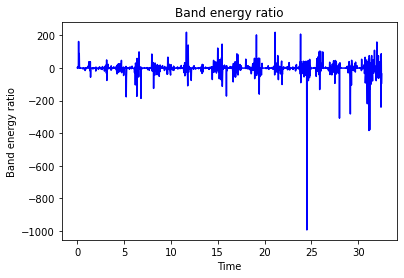

In [7]:
#%% Visualise the Band Energy Ratio curves
frames = range(len(BERs))
#Calculate the time based on frames
t = librosa.frames_to_time(frames=frames, hop_length=HOP_SIZE)
print(len(t))

plt.plot(t, BERs, color='b')
plt.xlabel("Time")
plt.ylabel("Band energy ratio")
plt.title("Band energy ratio")
plt.show()